BloomTech Data Science

*Unit 2, Sprint 1, Module 4*

---

# Module Project: Logistic Regression

Do you like burritos? 🌯 You're in luck then, because in this project you'll create a model to predict whether a burrito is `'Great'`.

The dataset for this assignment comes from [Scott Cole](https://srcole.github.io/100burritos/), a San Diego-based data scientist and burrito enthusiast.

## Directions

The tasks for this project are the following:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function .
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline accuracy score for your dataset.
- **Task 6:** Build `model_logr` using a pipeline that includes three transfomers and `LogisticRegression` predictor. Train model on `X_train` and `X_test`.
- **Task 7:** Calculate the training and test accuracy score for your model.
- **Task 8:** Create a horizontal bar chart showing the 10 most influencial features for your  model.
- **Task 9:** Demonstrate and explain the differences between `model_lr.predict()` and `model_lr.predict_proba()`.

**Note**

You should limit yourself to the following libraries:

- `category_encoders`
- `matplotlib`
- `pandas`
- `sklearn`

# I. Wrangle Data

In [5]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 2.1 MB/s eta 0:00:00


In [59]:
from category_encoders import OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

In [37]:
def wrangle(filepath):
    # Import w/ DateTimeIndex
    df = pd.read_csv(filepath, parse_dates=['Date'],
                     index_col='Date')

    # Drop unrated burritos
    df.dropna(subset=['overall'], inplace=True)

    # Derive binary classification target:
    # We define a 'Great' burrito as having an
    # overall rating of 4 or higher, on a 5 point scale
    df['Great'] = (df['overall'] >= 4).astype(int)

    # Drop high cardinality categoricals
    df = df.drop(columns=['Notes', 'Location', 'Address', 'URL'])

    # Encode binary topping columns (explanation below)
    binary_cols = ['Unreliable', 'NonSD', 'Beef', 'Pico', 'Guac', 'Cheese', 'Fries', 'Sour cream',
                   'Pork', 'Chicken', 'Shrimp', 'Fish', 'Rice', 'Beans', 'Lettuce',
                   'Tomato', 'Bell peper', 'Carrots', 'Cabbage', 'Sauce', 'Salsa.1',
                   'Cilantro', 'Onion', 'Taquito', 'Pineapple', 'Ham', 'Chile relleno',
                   'Nopales', 'Lobster', 'Queso', 'Egg', 'Mushroom', 'Bacon', 'Sushi',
                   'Avocado', 'Corn', 'Zucchini', 'Chips']

    df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if type(x) == str else 0)

    # Create pseudo one-hot encoded categories for 'Burrito types' (explanation below)

    burrito_type = ['california', 'asada', 'surf', 'carnitas']

    for b in burrito_type:
      df[b] = df['Burrito'].str.lower().str.contains(b).astype(int)

    # Drop columns to prevent "leakage", perform at the end
    df = df.drop(columns=['Rec', 'overall', 'Burrito'])

    return df


**Task 1:** Use the above `wrangle` function to import the `burritos.csv` file into a DataFrame named `df`.

In [38]:
filepath = "https://raw.githubusercontent.com/bloominstituteoftechnology/DS-Unit-2-Linear-Models/master/data/burritos/burritos.csv"
df = wrangle(filepath)
df

,Neighborhood,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,...,Bacon,Sushi,Avocado,Corn,Zucchini,Great,california,asada,surf,carnitas
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-18,Miramar,3.5,4.2,0,6.49,3.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2016-01-24,San Marcos,3.5,3.3,0,5.45,3.5,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2016-01-24,NaN,NaN,NaN,0,4.85,1.5,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
2016-01-24,NaN,NaN,NaN,0,5.25,2.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
2016-01-27,Carlsbad,4.0,3.8,1,6.59,4.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-27,NaN,NaN,NaN,0,6.00,1.0,NaN,NaN,17.0,20.5,...,0,0,0,0,0,0,0,0,0,0
2019-08-27,NaN,NaN,NaN,0,6.00,4.0,NaN,NaN,19.0,26.0,...,0,0,0,0,0,1,0,0,0,0
2019-08-27,NaN,NaN,NaN,0,7.90,3.0,NaN,NaN,20.0,22.0,...,0,0,0,0,0,0,1,0,0,0


During your exploratory data analysis, note that there are several columns whose data type is `object` but that seem to be a binary encoding. For example, `df['Beef'].head()` returns:

```
0      x
1      x
2    NaN
3      x
4      x
Name: Beef, dtype: object
```

**Task 2:** Change the `wrangle` function so that these columns are properly encoded as `0` and `1`s. Be sure your code handles upper- and lowercase `X`s, and `NaN`s.

In [12]:
# Conduct your exploratory data analysis here
# And modify the `wrangle` function above.

df['Beef'].head()

Date
2016-01-18      x
2016-01-24      x
2016-01-24    NaN
2016-01-24      x
2016-01-27      x
Name: Beef, dtype: object

In [31]:
df['Beef'].value_counts()

0    242
1    179
Name: Beef, dtype: int64

In [14]:
df.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421 entries, 2016-01-18 to 2019-08-27
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Burrito        421 non-null    object
 1   Chips          26 non-null     object
 2   Reviewer       420 non-null    object
 3   Unreliable     33 non-null     object
 4   NonSD          7 non-null      object
 5   Beef           179 non-null    object
 6   Pico           158 non-null    object
 7   Guac           154 non-null    object
 8   Cheese         159 non-null    object
 9   Fries          127 non-null    object
 10  Sour cream     92 non-null     object
 11  Pork           51 non-null     object
 12  Chicken        21 non-null     object
 13  Shrimp         21 non-null     object
 14  Fish           6 non-null      object
 15  Rice           36 non-null     object
 16  Beans          35 non-null     object
 17  Lettuce        11 non-null     object
 18  Tomato     

In [16]:
# looking at all of the columns from 22 to the last one
# df.iloc[:, 22:-1].info() to get info about the types and what is showing up

# get all the columns to copy into wrangle function
# df.iloc[:, 22:-1].columns

Index(['NonSD', 'Beef', 'Pico', 'Guac', 'Cheese', 'Fries', 'Sour cream',
       'Pork', 'Chicken', 'Shrimp', 'Fish', 'Rice', 'Beans', 'Lettuce',
       'Tomato', 'Bell peper', 'Carrots', 'Cabbage', 'Sauce', 'Salsa.1',
       'Cilantro', 'Onion', 'Taquito', 'Pineapple', 'Ham', 'Chile relleno',
       'Nopales', 'Lobster', 'Queso', 'Egg', 'Mushroom', 'Bacon', 'Sushi',
       'Avocado', 'Corn', 'Zucchini'],
      dtype='object')

In [27]:
#binary_cols = ['Unreliable', 'NonSD', 'Beef', 'Pico', 'Guac', 'Cheese', 'Fries', 'Sour cream',
#             'Pork', 'Chicken', 'Shrimp', 'Fish', 'Rice', 'Beans', 'Lettuce',
#             'Tomato', 'Bell peper', 'Carrots', 'Cabbage', 'Sauce', 'Salsa.1',
#             'Cilantro', 'Onion', 'Taquito', 'Pineapple', 'Ham', 'Chile relleno',
#             'Nopales', 'Lobster', 'Queso', 'Egg', 'Mushroom', 'Bacon', 'Sushi',
#             'Avocado', 'Corn', 'Zucchini', 'Chips']

In [18]:
# we have discovered that all of the true values are strings with either "x" or "X", so we are going to make the column binary
# lambda function works to insert mini functions into a column, then calling head to see results
# df['Beef'].apply(lambda x: 1 if type(x) == str else 0).head(10)

Date
2016-01-18    1
2016-01-24    1
2016-01-24    0
2016-01-24    1
2016-01-27    1
2016-01-28    0
2016-01-30    1
2016-01-30    0
2016-02-01    1
2016-02-06    1
Name: Beef, dtype: int64

In [28]:
# we want to do the same thing we did with the 'Beef' column above, but apply it throughout the entire dataframe by using applymap
# use our binary_cols array to apply it to everything
# df[binary_cols].applymap(lambda x: 1 if type(x) == str else 0).head(10)

,Unreliable,NonSD,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Chicken,...,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Chips
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-18,0,0,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-24,0,0,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-24,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-24,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-27,0,0,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2016-01-28,0,0,0,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2016-01-30,0,0,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-30,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2016-02-01,0,0,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


If you explore the `'Burrito'` column of `df`, you'll notice that it's a high-cardinality categorical feature. You'll also notice that there's a lot of overlap between the categories.

**Stretch Goal:** Change the `wrangle` function above so that it engineers four new features: `'california'`, `'asada'`, `'surf'`, and `'carnitas'`. Each row should have a `1` or `0` based on the text information in the `'Burrito'` column. For example, here's how the first 5 rows of the dataset would look.

| **Burrito** | **california** | **asada** | **surf** | **carnitas** |
| :---------- | :------------: | :-------: | :------: | :----------: |
| California  |       1        |     0     |    0     |      0       |
| California  |       1        |     0     |    0     |      0       |
|  Carnitas   |       0        |     0     |    0     |      1       |
| Carne asada |       0        |     1     |    0     |      0       |
| California  |       1        |     0     |    0     |      0       |

**Note:** Be sure to also drop the `'Burrito'` once you've engineered your new features.

In [34]:
# Conduct your exploratory data analysis here
# And modify the `wrangle` function above.

# put all the different burrito types into one array
# burrito_type = ['california', 'asada', 'surf', 'carnitas']

# you can create a function that changes each burrito category to binary
# df['Burrito'].str.lower().str.contains(burrito_type[0]).astype(int)

# for the assignment, do a for loop to cycle through the array, creating a column in the data frame with each burrito type

# for b in burrito_type:
#   df[b] = df['Burrito'].str.lower().str.contains(b).astype(int)

In [35]:
# check the results from the for loop
df[['california', 'asada', 'surf', 'carnitas']].head()

,california,asada,surf,carnitas
Date,,,,
2016-01-18,1,0,0,0
2016-01-24,1,0,0,0
2016-01-24,0,0,0,1
2016-01-24,0,1,0,0
2016-01-27,1,0,0,0


# II. Split Data

**Task 3:** Split your dataset into the feature matrix `X` and the target vector `y`. You want to predict `'Great'`.

In [39]:
target = 'Great'
X = df.drop(columns = target)
y = df[target]

**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from 2016 through 2017.
- Your test set should include data from 2018 and later.

In [40]:
cutoff = '2018'
mask = X.index < cutoff
X_train, y_train = X.loc[mask], y.loc[mask]
X_test, y_test = X.loc[~mask], y.loc[~mask]

In [42]:
# Check to make sure it worked properly
len(X_train) + len(X_test) == len(X)

True

# III. Establish Baseline

**Task 5:** Since this is a **classification** problem, you should establish a baseline accuracy score. Figure out what is the majority class in `y_train` and what percentage of your training observations it represents.

In [44]:
# normalize it to get a percentage to see how many "great" burritos there are
y_train.value_counts(normalize=True)

0    0.582245
1    0.417755
Name: Great, dtype: float64

In [45]:
baseline_acc = y_train.value_counts(normalize=True).max()
print('Baseline Accuracy Score:', baseline_acc)

Baseline Accuracy Score: 0.5822454308093995


# IV. Build Model

**Task 6:** Build a `Pipeline` named `model_logr`, and fit it to your training data. Your pipeline should include:

- a `OneHotEncoder` transformer for categorical features,
- a `SimpleImputer` transformer to deal with missing values,
- a [`StandarScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) transfomer (which often improves performance in a logistic regression model), and
- a `LogisticRegression` predictor.

In [49]:
model_logr = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    LogisticRegression()
)

model_logr.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Neighborhood', 'Reviewer'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

# IV. Check Metrics

**Task 7:** Calculate the training and test accuracy score for `model_logr`.

In [50]:
training_acc = model_logr.score(X_train, y_train)
test_acc = model_logr.score(X_test, y_test)

print('Training MAE:', training_acc)
print('Test MAE:', test_acc)

Training MAE: 0.97911227154047
Test MAE: 0.7894736842105263


# V. Communicate Results

**Task 8:** Create a horizontal barchart that plots the 10 most important coefficients for `model_lr`, sorted by absolute value.

**Note:** Since you created your model using a `Pipeline`, you'll need to use the [`named_steps`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) attribute to access the coefficients in your `LogisticRegression` predictor. Be sure to look at the shape of the coefficients array before you combine it with the feature names.

In [53]:
# Create your horizontal barchart here.
# coefficients is a list inside of a list, so must put index [0] at the end of it, or else get an error message saying "Length of values (1) does not match length of index (194)"
coefficients = model_logr.named_steps['logisticregression'].coef_[0]
features = model_logr.named_steps['onehotencoder'].get_feature_names()
feat_imp = pd.Series(coefficients, index = features).sort_values(key=abs)

/usr/local/lib/python3.10/dist-packages/category_encoders/utils.py:362: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  warnings.warn("`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.",


Text(0.5, 0, 'Feature Importance')

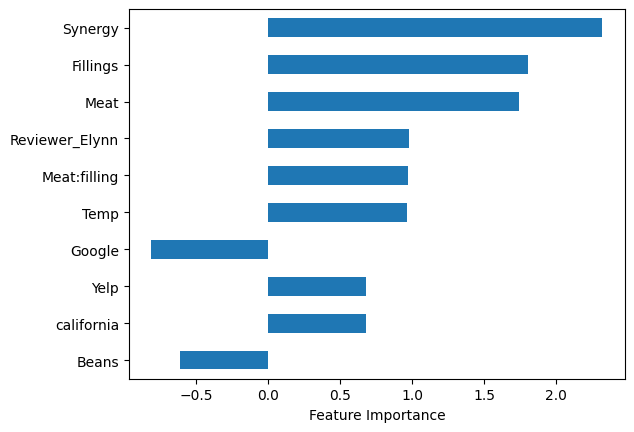

In [55]:
feat_imp.tail(10).plot(kind='barh')
plt.xlabel('Feature Importance')

There is more than one way to generate predictions with `model_lr`. For instance, you can use [`predict`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression) or [`predict_proba`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression.predict_proba).

**Task 9:** Generate predictions for `X_test` using both `predict` and `predict_proba`. Then below, write a summary of the differences in the output for these two methods. You should answer the following questions:

- What data type do `predict` and `predict_proba` output?
- What are the shapes of their different output?
- What numerical values are in the output?
- What do those numerical values represent?

In [61]:
# Write code here to explore the differences between `predict` and `predict_proba`.

# run this to see both values of probability
np.round(model_logr.predict_proba(X_test), 2)

# run this to just see the second column for probability estimates if the burrito is "great"
np.round(model_logr.predict_proba(X_test)[:, -1], 2)

array([1.  , 1.  , 0.01, 1.  , 0.  , 0.14, 0.97, 1.  , 1.  , 0.93, 0.69,
       0.  , 0.45, 0.61, 0.98, 0.98, 0.95, 0.  , 0.01, 0.  , 0.  , 0.99,
       0.05, 0.93, 0.68, 0.19, 0.  , 1.  , 0.93, 1.  , 0.01, 0.91, 0.99,
       0.  , 0.69, 0.83, 1.  , 0.99])

**Give your written answer here:**

```
It gave a float value that was between 0 and 1 in two columns, both numbers added up to one. They represented the probability that a burrito would be "great," so we took the second value

```
